# Training Models Exercises

### Linear Regression Model

##### The normal equation 
Generating some linear-looking data 

In [1]:
import numpy as np 

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

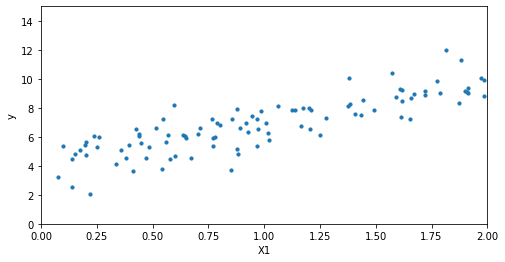

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

Now let's compute the Normal Equation

In [12]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance

# linalg.inv - inverse matrix
# dot - matrix multiplication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.00986215],
       [2.90325203]])

Noise made it impossible to recover the exact parameters (4 and 3) of the original function.
Now we can make predictions using this theta.

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00986215],
       [9.8163662 ]])

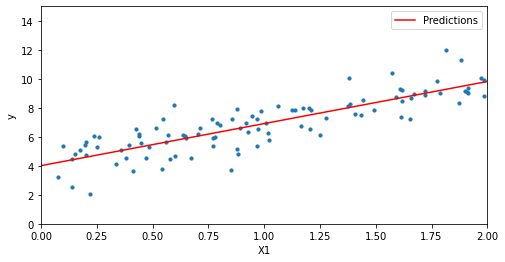

In [7]:
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, "r-", label='Predictions')
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Performing linear regression using scikit learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00986215]), array([[2.90325203]]))

In [9]:
lin_reg.predict(X_new)

array([[4.00986215],
       [9.8163662 ]])

#### Gradient descent

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances

# random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[4.00986215],
       [2.90325203]])

#### Stochastic Gradient Descent
Using a simple learning scheduling - gradually reducing the learning rate.

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    
theta

array([[4.01948883],
       [2.92250261]])

Using sklearn SGD Regressor

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90910196]), array([2.84147697]))

#### Mini-batch Gradient Descent